# Part 0 : Imports and data loading.

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Data loading

In [2]:
data= pd.read_csv("data.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We drop the Id column from the dataset asit shows no significance.

In [3]:
data.drop('Id', inplace=True, axis=1)

# Part 1: Exploratory Data Analysis

#### 1.1 Overview of features and relation to target

- How many rows and columns are there?
- What are the names of the features (columns)?
- Which features are numerical, which are categorical?
- How many values are missing?
- The shape and info methods answer these questions
- -head displays some rows of the dataset
- -describe gives a summary of the statistics (only for numerical columns)
- Distribution of the target variable SalePrice

#### shape, info, head and describe

In [4]:
data.shape

(1460, 80)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

This shows all the numerical features and its statistical measures. We see there are a lot of missing values and outliers in some. We will furthermore work on them during data pre processing. As of now, we get a basic overview of our data.

- We have total 80 columns with 1 output i.e. SalePrice.
- We have 37 numerical and 43 categorical features.
- There are many features with null values.        


In [6]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.describe() # this determines the datatype of every feature and its count.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Distribution of the target variable SalePrice

In [9]:
data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

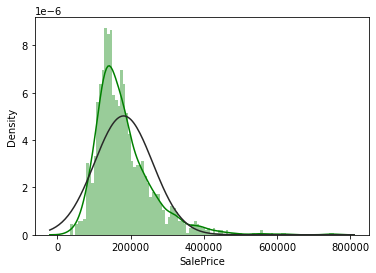

In [10]:

sns.distplot(data["SalePrice"],color='g', bins=100, hist_kws={'alpha': 0.4}, fit=norm)


Insights:
- It deviates slightly from normal distribution.This can reduce the performance of the ML regression models because some assume normal distribution.Therfore we make a log transformation, the resulting distribution looks much better.
- Skewness: It is positively skewed.
- It also shows peakedness.
- Some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the          independent variable (`SalePrice`) for machine learning.

In [11]:
print("Skewness:",data["SalePrice"].skew())
print("Kurtosis:",data["SalePrice"].kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


#### Log transforming output in order to get a normal distribution.

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


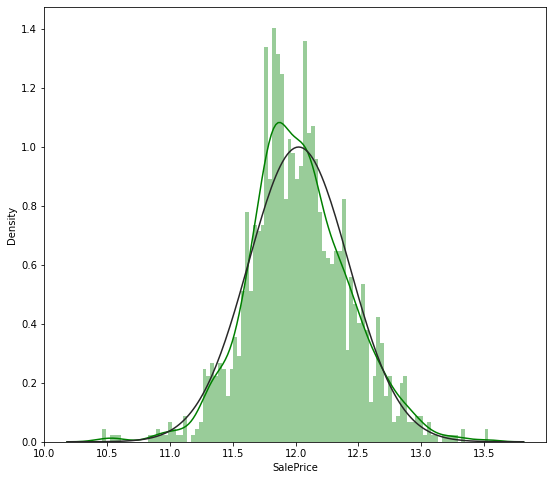

In [7]:
data["SalePrice"] = np.log(data["SalePrice"])
plt.figure(figsize=(9, 8))
sns.distplot(data["SalePrice"],color='g', bins=100, hist_kws={'alpha': 0.4}, fit= norm)
print("Skewness:",data["SalePrice"].skew())
print("Kurtosis:",data["SalePrice"].kurt())

#### 1.2 Relation of all numerical features to target SalePrice
- Correlation matrix (heatmap style)
- SalePrice correlation matrix for top 10 correlated features
- Scatter plots between 'SalePrice' and correlated variables
- Bi-variate analysis



#### Correlation matrix (heatmap style)

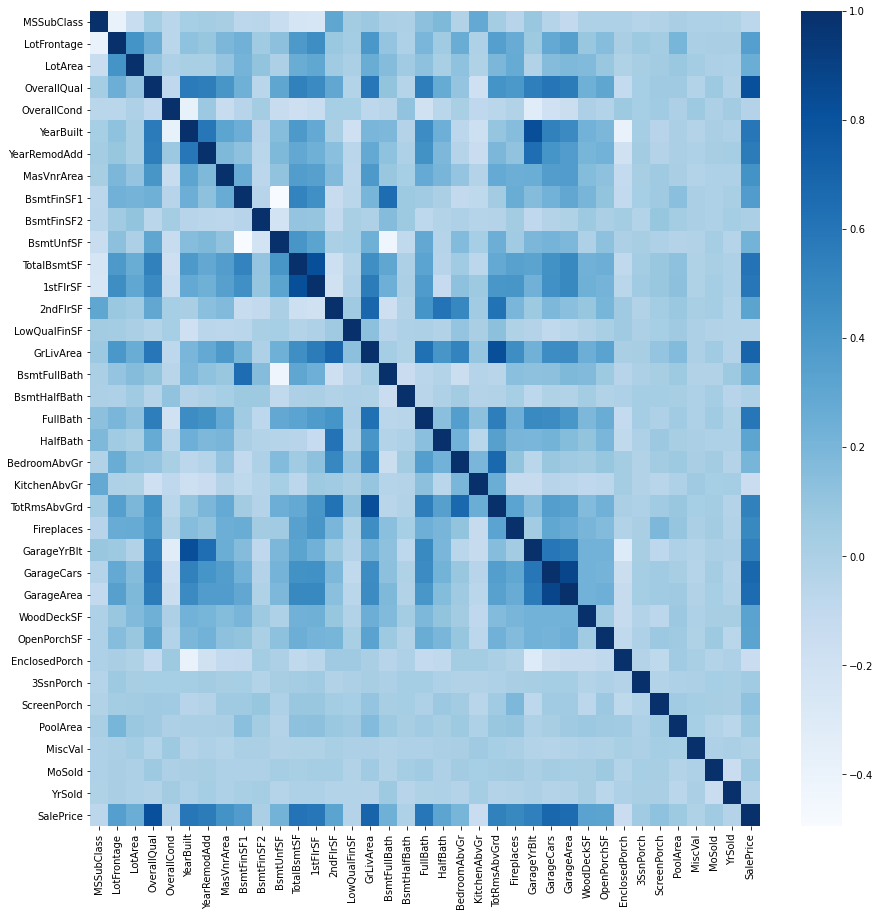

In [13]:
plt.figure(figsize=(15,15))
corr_mat=sns.heatmap(data.corr(),cmap= 'Blues')

In [14]:
corr = data.corr()
corr['SalePrice'].sort_values(ascending=False)[:13]


SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489449
Name: SalePrice, dtype: float64

Top features with minimum correlation of atleast 0.5 with the target are as follows:
OverallQual ,GrLivArea,GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF,FullBath, YearBuilt, YearRemodAdd, GarageYrBlt and TotRmsAbvGrd.    
              

#### SalePrice correlation matrix for top 10 correlated features

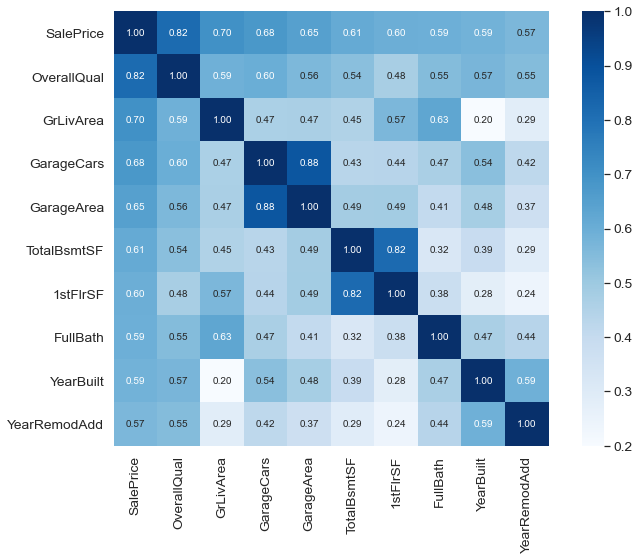

In [15]:
plt.figure(figsize=(12,8))
corr= data.corr()
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap= "Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Scatter plots between 'SalePrice' and correlated variables

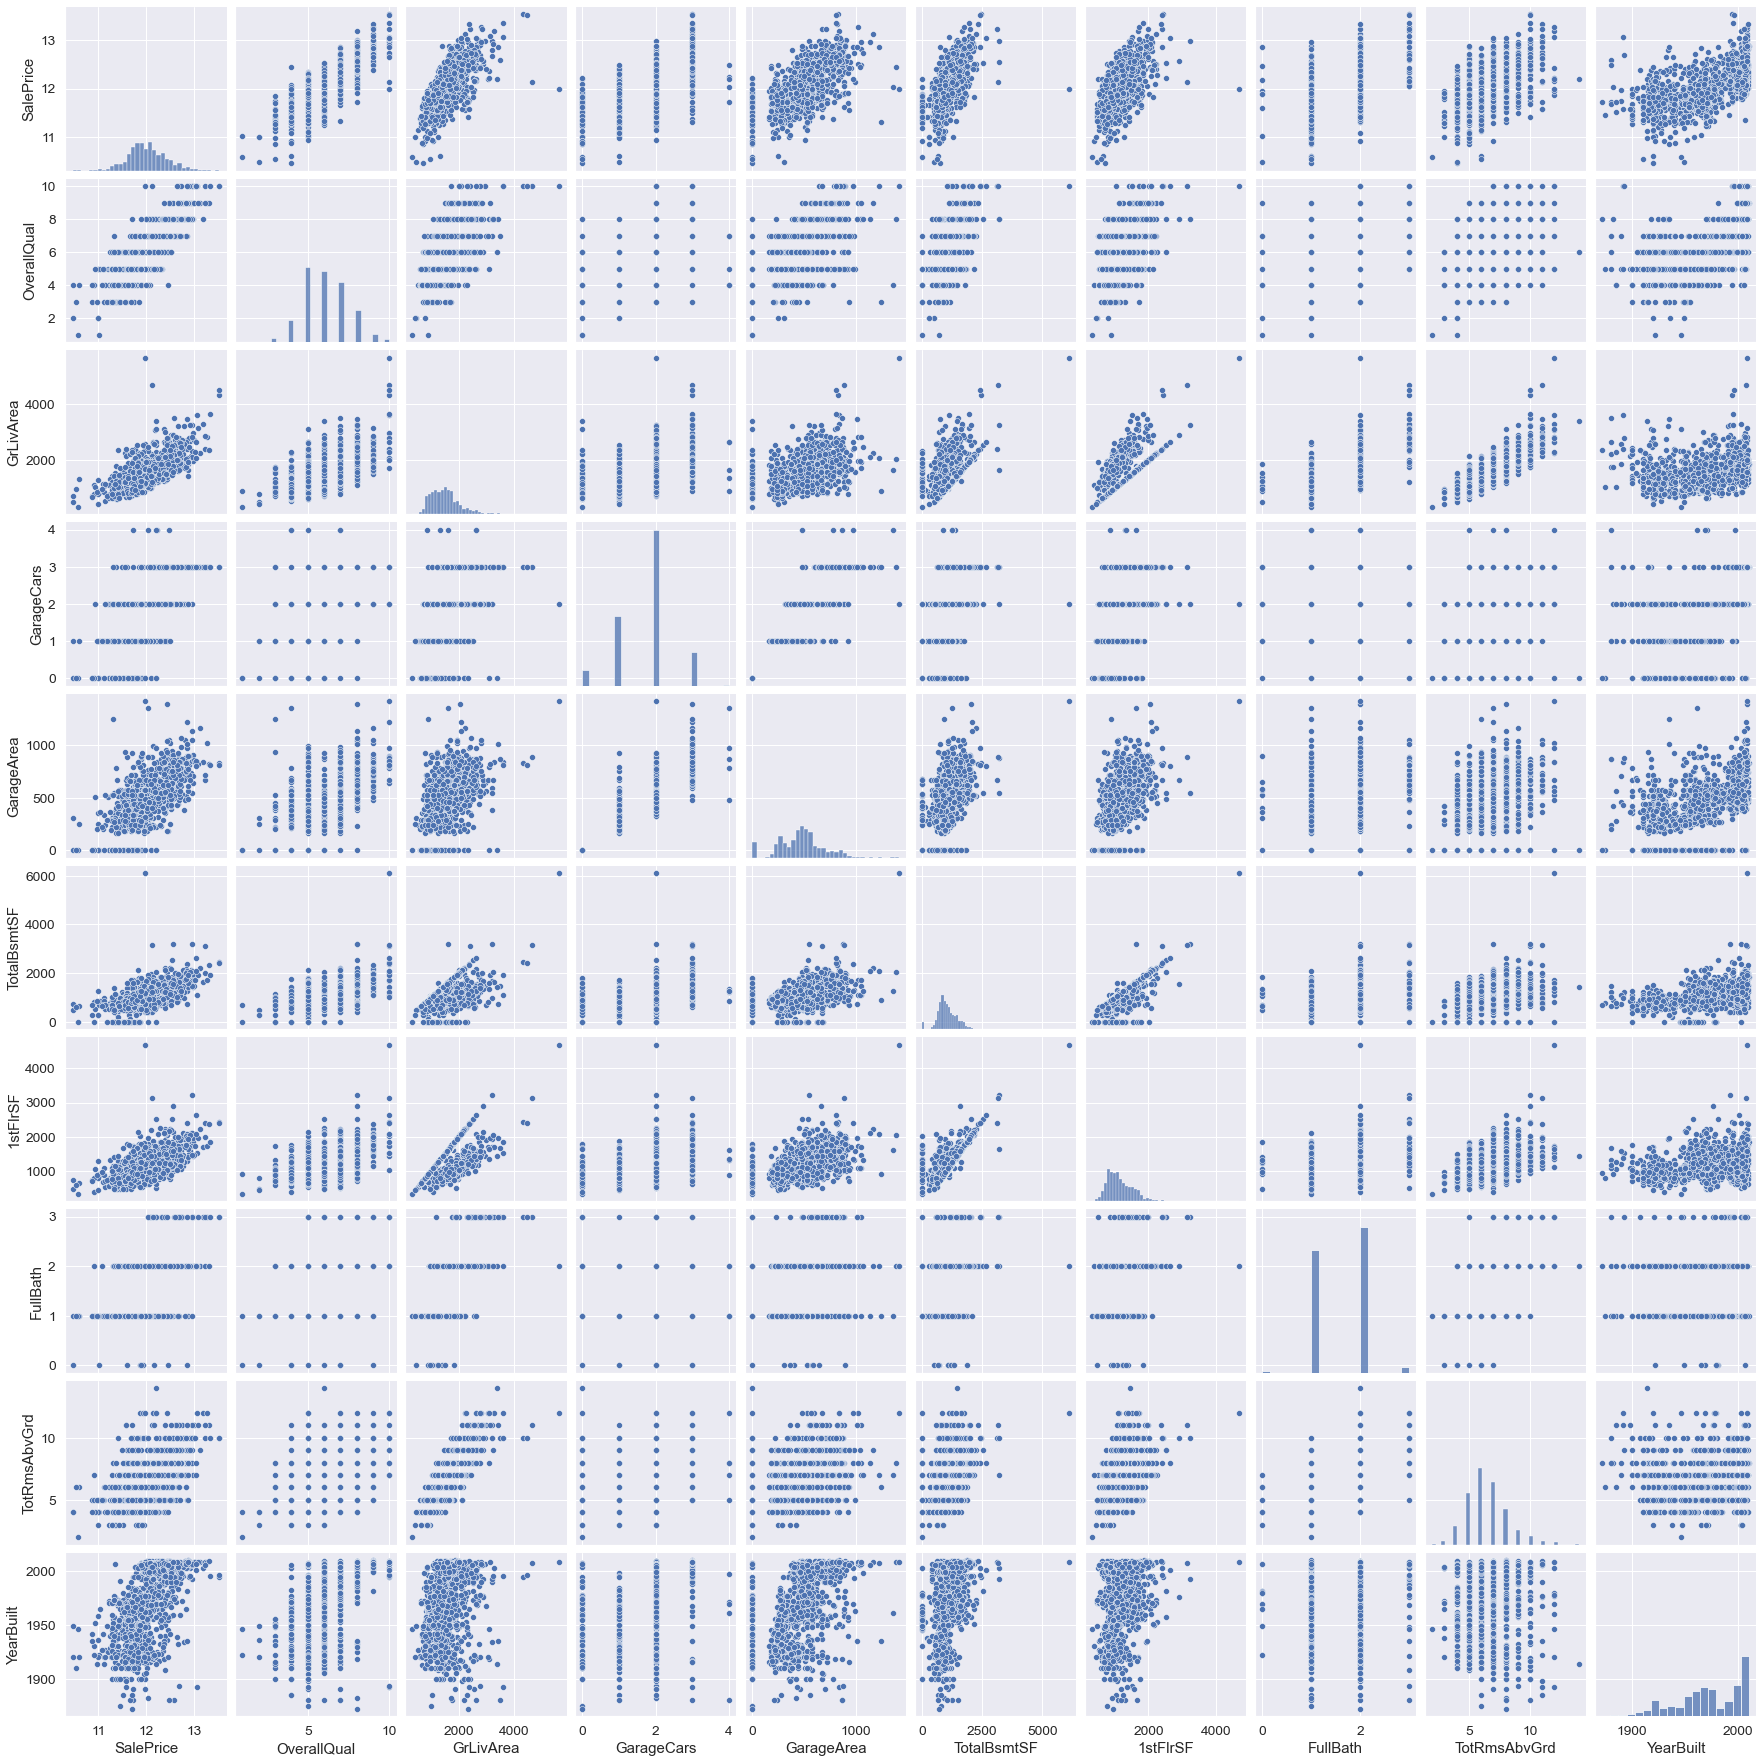

In [16]:
corr_col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF', 'FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(data[corr_col], size = 2.5)

In [95]:
num_features_imp= ['OverallQual' ,'GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd']

#### Bi-variate analysis

Let's dig down deeper into analysing relationship of output with highly correlated features. Study outliers and answer the many 'why's?'. 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

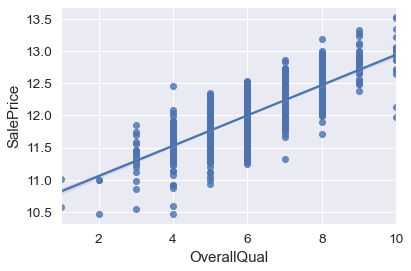

In [18]:
# Bivariate analysis SalePrice/OverallQual
sns.regplot(x= data['OverallQual'], y=data["SalePrice"])


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

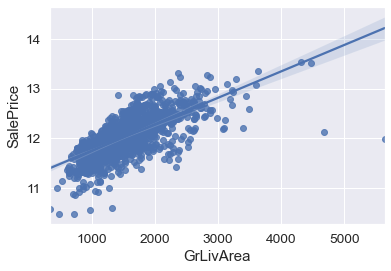

In [19]:
# Bivariate analysis SalePrice/GrLivArea
sns.regplot( x= data['GrLivArea'], y=data["SalePrice"])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

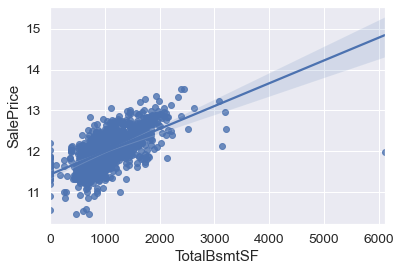

In [20]:
# Bivariate analysis SalePrice/TotalBsmtSF
sns.regplot( x= data['TotalBsmtSF'], y=data["SalePrice"])

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

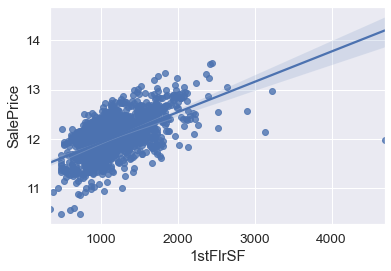

In [21]:
# Bivariate analysis SalePrice/1stFlrSF
sns.regplot( x= data['1stFlrSF'], y=data["SalePrice"])


- 'OverallQual', 'GrLivArea', '1stFlrSF' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

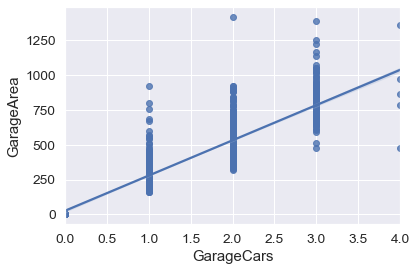

In [22]:
# Bivariate analysis GarageCars/GarageArea
sns.regplot( x= data['GarageCars'], y=data['GarageArea'])

- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. This is because the number of cars that fit into the garage is a consequence of the garage area.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='1stFlrSF'>

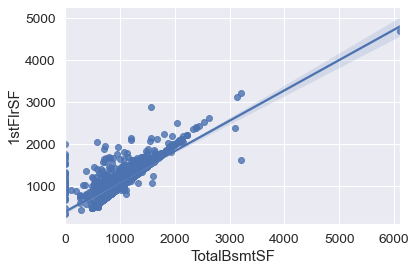

In [23]:
# Bivariate analysis TotalBsmtSF/1stFlrSF
sns.regplot( x= data['TotalBsmtSF'], y=data['1stFlrSF'])

- 'TotalBsmtSF' and '1stFloor' are also strongly correlated variables.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

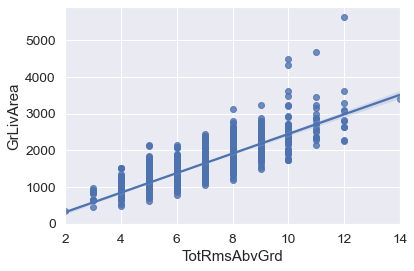

In [24]:
# Bivariate analysis TotRmsAbvGrd/GrLivArea
sns.regplot( x= data['TotRmsAbvGrd'], y=data['GrLivArea'])

 - 'TotRmsAbvGrd' and 'GrLivArea' are highly correlated.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

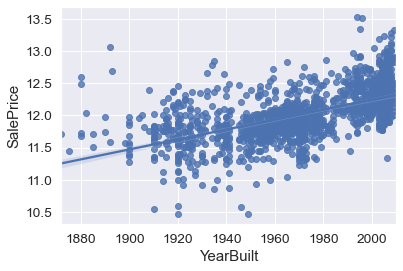

In [25]:
# Bivariate analysis SalePrice/YearBuilt
sns.regplot( x= data['YearBuilt'], y=data["SalePrice"])

- 'YearBuilt' is slightly correlated with 'SalePrice'. Also, as per a normal tendency, an individual is more prone to spending more in new stuffs than old.

#### 1.3 Relation of all categorical features to target SalePrice
- Seprerate Categorical features.
- plot boxplots for all categorical with respect to output.
- plot barplots for all categorical with respect to output.
- Conduct Chi-square test to check the relationahip between target and categorical variables. Also shortlisting the most important variables on the basis of the test and graphs analysis.


#### Seprerate Categorical features.

In [8]:
#Seperating Numerical and Categorical features.
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


#### boxplots for all categorical with respect to output.

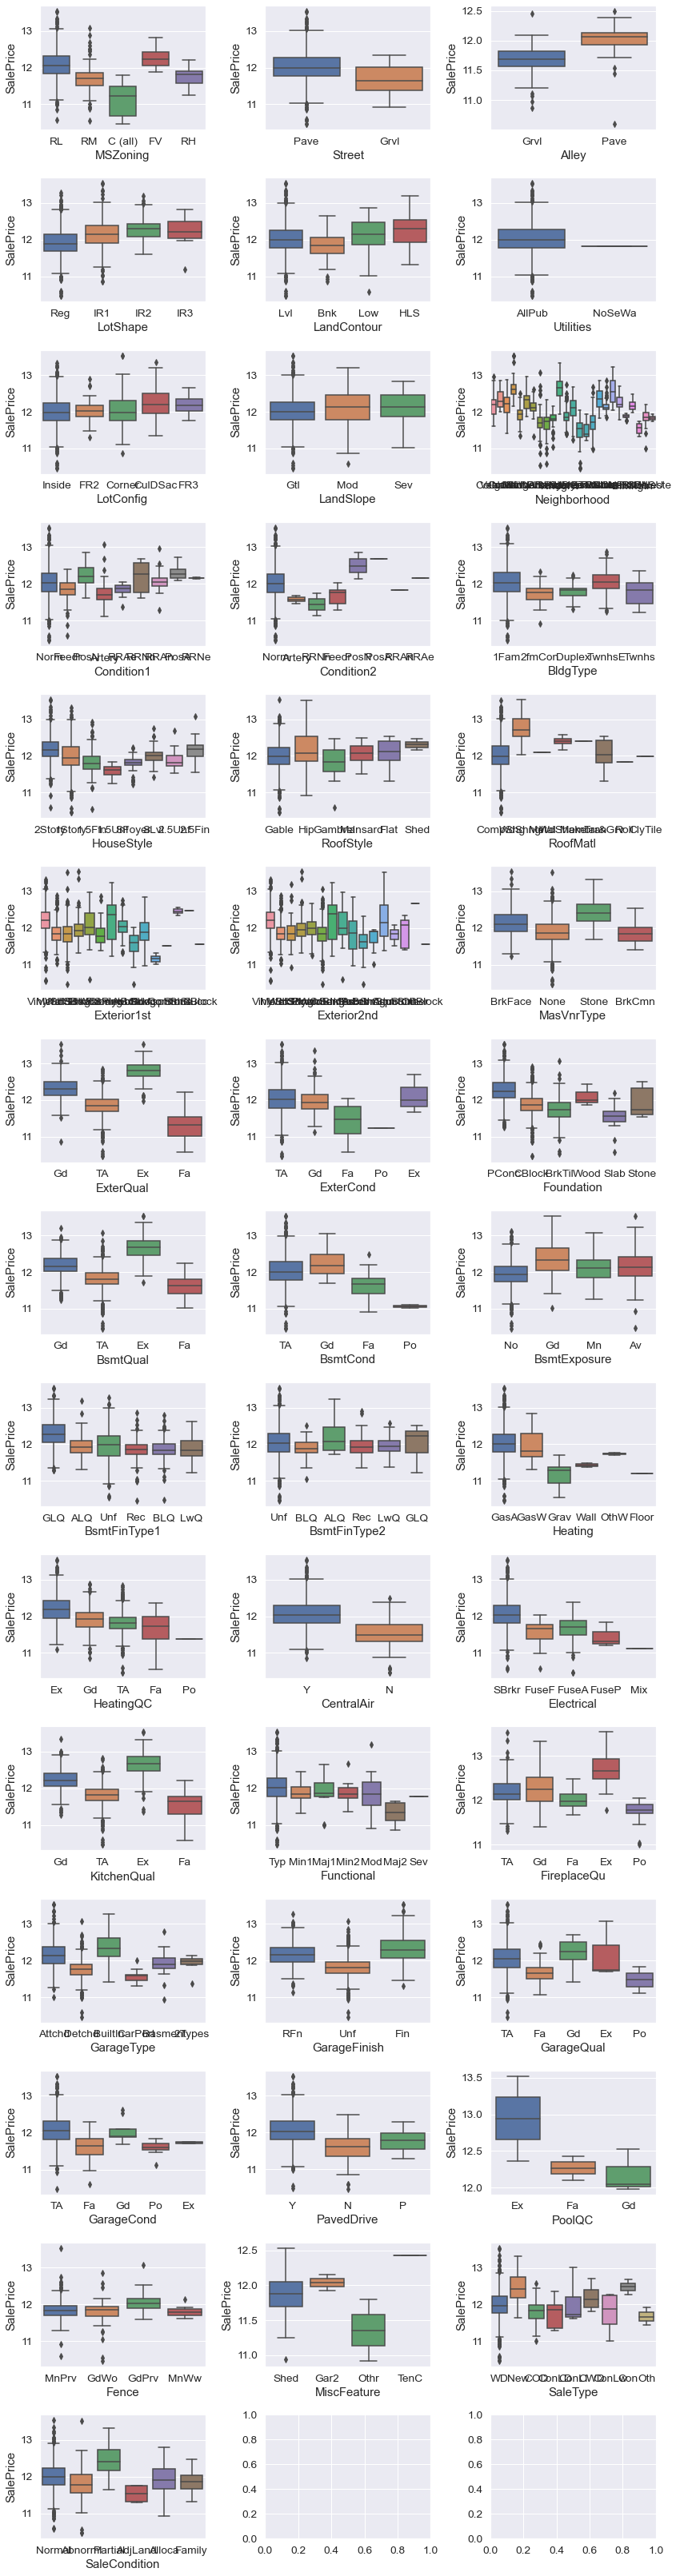

In [27]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=data['SalePrice'], data=data, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

#### barplots for all categorical with respect to output.¶

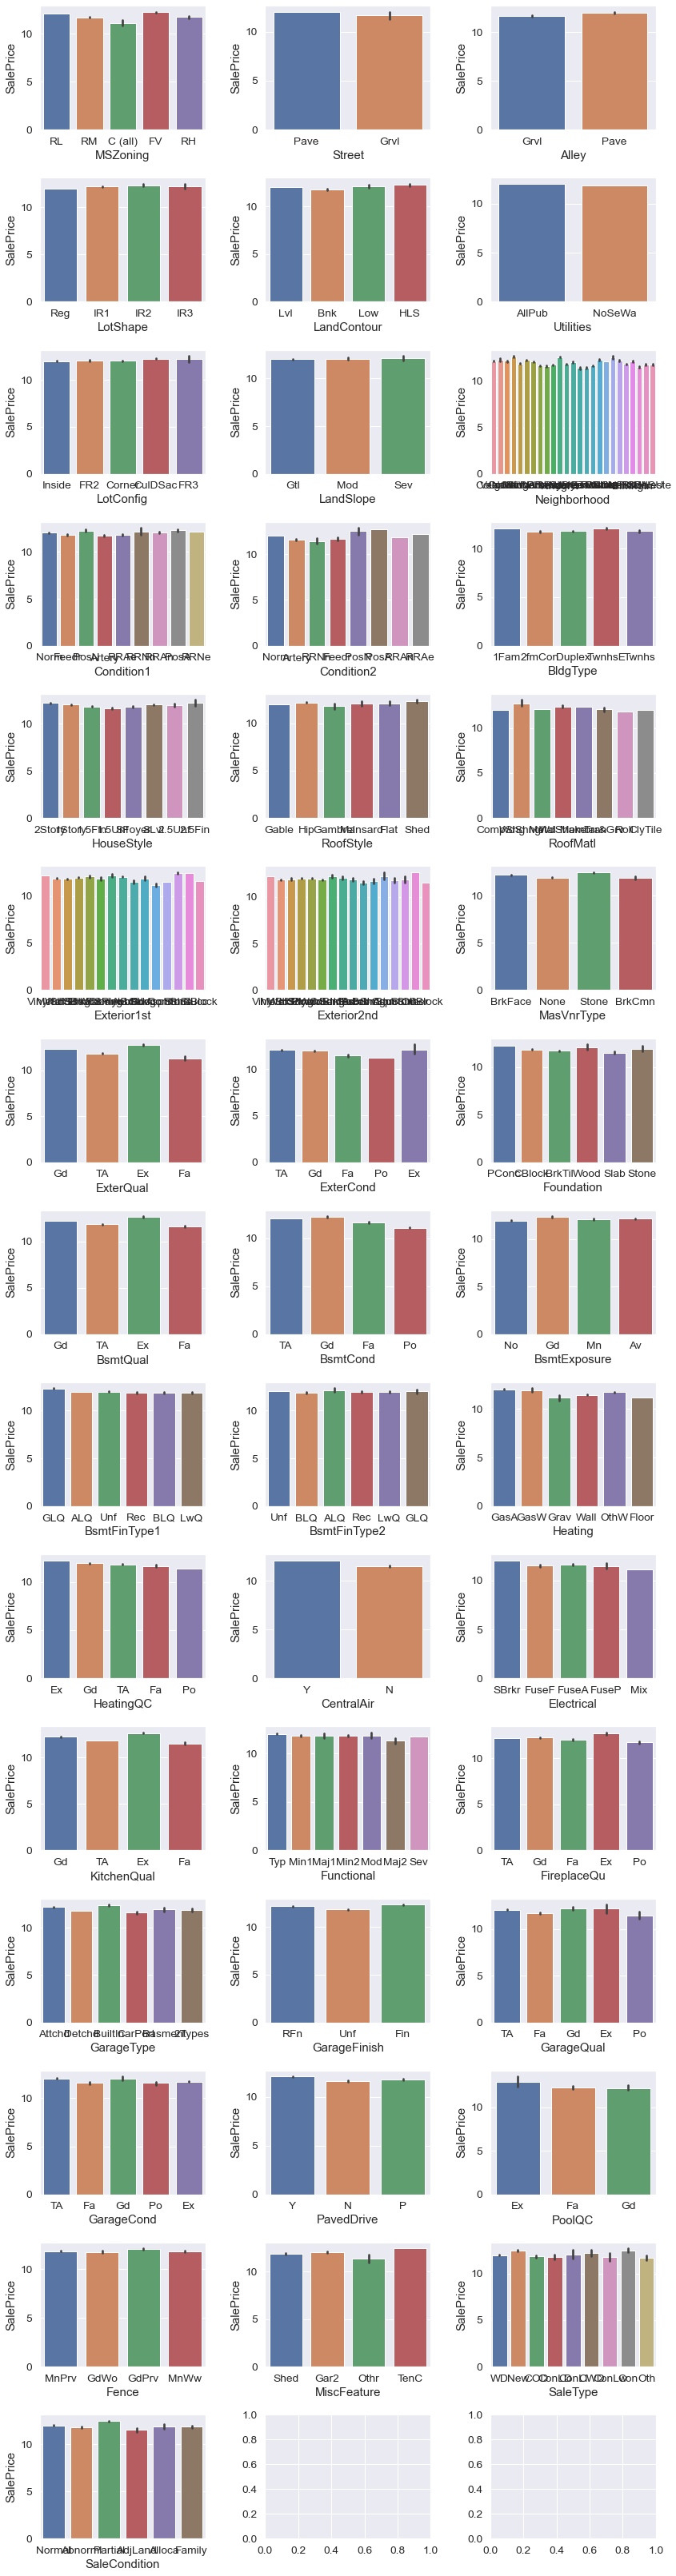

In [28]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.barplot(x=li_cat_feats[i], y=data['SalePrice'], data=data, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

#### Chi-square test to check the relationahip between target and categorical variables

Our hypotheses will be:
- H0: There is no relationship between two variables.
    i.e. they both are independent of each other.
- H1: There is a relationship between two variables.
    i.e. they both are dependent on each other.

In [29]:
from scipy.stats import chi2_contingency, chi2
alpha = 0.05 #Significance Level 5%

for i in categorical_feats:
    
    print("Variable name is:", i)
    #Contingency Table
    contingency_table=pd.crosstab(data[i],data["SalePrice"])
    Observed_Values = contingency_table.values
    b= chi2_contingency(contingency_table)
    Expected_Values= b[3]
    
    #Degree of freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom:-",df)
    
    #Chi square statistic
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    
    #Critical Value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    print('critical_value:',critical_value)
    
    #P value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    
    print('p-value:',p_value)
    
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    print('*'*120)

Variable name is: MSZoning
Degree of Freedom:- 1
chi-square statistic:- 290.00000000000006
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
************************************************************************************************************************
Variable name is: Street
Degree of Freedom:- 1
chi-square statistic:- 0.008253094910591471
critical_value: 3.841458820694124
p-value: 0.927614524618683
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
************************************************************************************************************************
Variable name is: Alley
Degree of Freedom:- 1
chi-square statistic:- 2.0395121951219513
critical_value: 3.841458820694124
p-value: 0.15325878673175775
Retain H0,There is no relationship between 2 catego

Degree of Freedom:- 1
chi-square statistic:- 2.3852080123266566
critical_value: 3.841458820694124
p-value: 0.1224885872040955
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
************************************************************************************************************************
Variable name is: BsmtCond
Degree of Freedom:- 1
chi-square statistic:- 0.17086193745232645
critical_value: 3.841458820694124
p-value: 0.6793469100116551
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
************************************************************************************************************************
Variable name is: BsmtExposure
Degree of Freedom:- 1
chi-square statistic:- 5.9265192556964665
critical_value: 3.841458820694124
p-value: 0.014914673408005563
Reject H0,There is a relationship between 2 categor

Degree of Freedom:- 1
chi-square statistic:- 26.91089108910891
critical_value: 3.841458820694124
p-value: 2.1305490482959044e-07
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
************************************************************************************************************************


- From above analysis,we can conclude that out of all categorical variables, some like MSZoning, Neighborhood, Exterior1st, BsmtExposure, BsmtFinType1, HeatingQC, CentralAir, Electrical, FireplaceQu, GarageCond, PavedDrive, Fence, MiscFeature and SaleCondition have a strong relationship with target SalePrice.
- In further analsyis, we can decide to drop the rest.


In [30]:
categorical_feats_imp= ['MSZoning', 'Neighborhood', 'Exterior1st', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition']

# Part 2 Data Preprocessing

#### 1.1 Handling missing values and log transform
- List of features with missing values 
- Filling missing values
- log transform

#### List of features with missing values 

In [31]:
data_null=data.isnull().sum().sort_values(ascending=False)
data_null.head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

Insights:
- For a few columns there is lots of NaN entries.
- Out of 19 total columns with Nan,3 Numerical features namely, LotFrontage, MasVnrArea and GarageYrBlt has Nan entries.
- For categorical variables, reading the data description we find this is not missing data:
- For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [97]:
new_numerical_feat=numerical_feats.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
new_numerical_feat

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Filling missing values

In [9]:
data.fillna('None', inplace =True) # Replacing NaN with None in columns where it has a meaning

In [10]:
data.isnull().sum().sum() #Shows missing values in data.

0

In [11]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,12.072541
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,12.254863
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,11.864462


#### Log transform

Like the target variable, also some of the feature values are not normally distributed and it is therefore better to use log values in data.

In [36]:


# Checking for skewness and kurtosis:

for i in new_numerical_feat:
    print("Column:", i)
    print("Skewness:",data[i].skew())
    print("Kurtosis:",data[i].kurt())
    print('*'*120)
    

Column: MSSubClass
Skewness: 1.4076567471495591
Kurtosis: 1.5801879649863309
************************************************************************************************************************
Column: LotArea
Skewness: 12.207687851233496
Kurtosis: 203.24327101886033
************************************************************************************************************************
Column: OverallQual
Skewness: 0.2169439277628693
Kurtosis: 0.09629277835615113
************************************************************************************************************************
Column: OverallCond
Skewness: 0.6930674724842182
Kurtosis: 1.1064134613731684
************************************************************************************************************************
Column: YearBuilt
Skewness: -0.613461172488183
Kurtosis: -0.43955194159361977
************************************************************************************************************************
Column: Y

- Let's check what's going on with 'GrLivArea'.

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

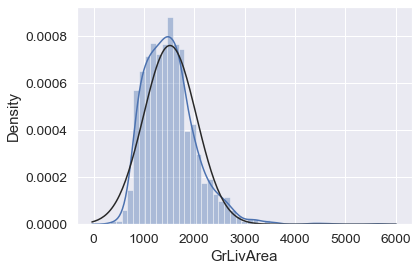

In [37]:
#Histogram
sns.distplot(data['GrLivArea'], fit=norm)

It looks like skewed. We apply log transform to it to normalise.

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

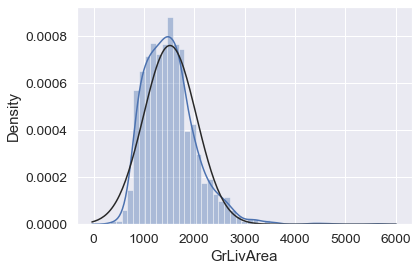

In [38]:
#data.GrLivArea = np.log(data.GrLivArea)
sns.distplot(data['GrLivArea'], fit=norm)

Next, TotalBsmtSF.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

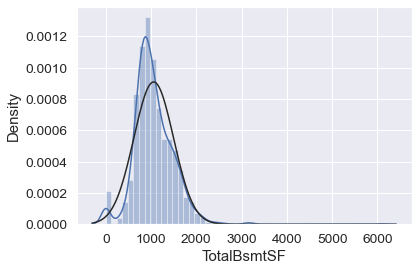

In [39]:
sns.distplot(data['TotalBsmtSF'], fit=norm)

In this, there are a significant amount of data with value zero which will not allow us to perform log transformation.
- For this, we create another column names 'HasBsmt', which will be inserted with 0 if no basement and 1 if it has a basement.
- Next, we apply to log transform to only the data with 'HasBsmt' as 1.


In [40]:
#data['HasBsmt'] = pd.Series(len(data['TotalBsmtSF']), index=data.index)
#data['HasBsmt'] = 0 # fill the series with all Zeros.
#data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1 # Insert 1 in the series where TotalBsmtSF is greater than 1.
#data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF']) # Apply log to the values where hasBsmt is 1.

In [41]:
#sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm) #We check Skewness and Kurtosis for data that is greater than Zero after log transform.

Last but not the least, 1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

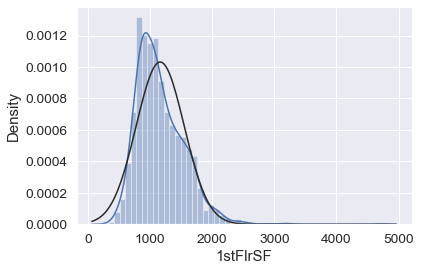

In [42]:
sns.distplot(data['1stFlrSF'], fit=norm)

Skewed again. We apply log to this too.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

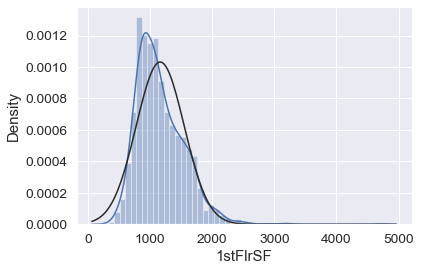

In [43]:
#data['1stFlrSF'] = np.log(data['1stFlrSF'])
sns.distplot(data['1stFlrSF'], fit=norm)

#### 1.2 Check for outliers


For this we check the pairplot of our target variable of SalePrice with other features and see if there are any values that doesn't follow a trend.


#### 'GrLivArea'

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

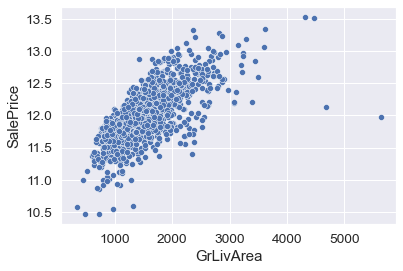

In [44]:
# Bivariate analysis SalePrice/GrLivArea
sns.scatterplot( x= data['GrLivArea'], y=data["SalePrice"])

- The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
- The two observations in the top of the plot look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [101]:
data.sort_values(by = 'GrLivArea', ascending = False) #Sorts values of data according to 'GrLivArea' in descending order to filter out index position of outliers.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,Gd,None,None,0,1,2008,New,Partial,11.982929
523,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,Inside,...,0,None,None,None,0,10,2007,New,Partial,12.126759
1182,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml,13.521139
691,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2007,WD,Normal,13.534473
1169,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2006,WD,Normal,13.345507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,30,RL,58.0,9098,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2007,WD,Normal,11.362103
29,30,RM,60.0,6324,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,5,2008,WD,Normal,11.134589
916,20,C (all),50.0,9000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,10,2006,WD,Abnorml,10.471950
1100,30,RL,60.0,8400,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,1,2009,WD,Normal,11.002100


In [12]:
data= data.drop(index=[1298,523])


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

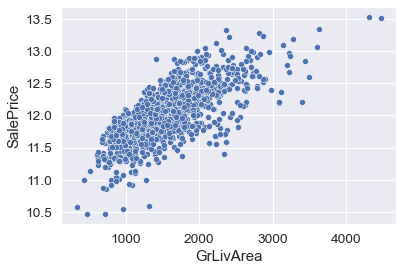

In [47]:
# Bivariate analysis SalePrice/GrLivArea
sns.scatterplot( x= data['GrLivArea'], y=data["SalePrice"])

#### 'TotalBsmtSF'

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

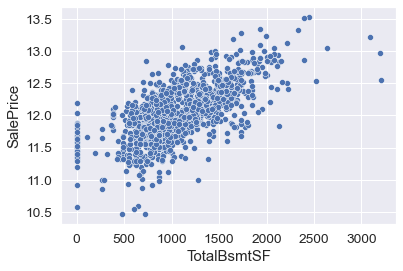

In [48]:
# Bivariate analysis SalePrice/TotalBsmtSF
sns.scatterplot( x= data['TotalBsmtSF'], y=data["SalePrice"])

This is the power of log transform. We now not see the outliers that we observed in EDA.

#### 1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

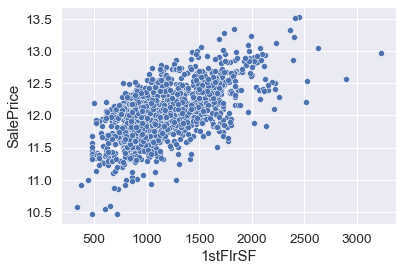

In [49]:
# Bivariate analysis SalePrice/1stFlrSF
sns.scatterplot( x= data['1stFlrSF'], y=data["SalePrice"])

Here again, We now not see the outliers that we observed in EDA.

# Part 2: Data Wrangling


- Dropping all columns with weak correlation to SalePrice
- Convert categorical columns to numerical
- Checking correlation to SalePrice for the new numerical columns
- Standardise the numeric data using StandardScaler

#### Dropping all columns with weak correlation to SalePrice

In [30]:
df=data.loc[:,['OverallQual' ,'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MSZoning','Neighborhood', 'Exterior1st', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageCond', 'PavedDrive', 'Fence','TotRmsAbvGrd', 'SaleCondition',  'SalePrice']]
df.head(10) # New dataset with highlt correlated features.

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MSZoning,...,HeatingQC,CentralAir,Electrical,FireplaceQu,GarageCond,PavedDrive,Fence,TotRmsAbvGrd,SaleCondition,SalePrice
0,7,1710,548,856,856,2,2003,2003,2003.0,RL,...,Ex,Y,SBrkr,None,TA,Y,None,8,Normal,12.247694
1,6,1262,460,1262,1262,2,1976,1976,1976.0,RL,...,Ex,Y,SBrkr,TA,TA,Y,None,6,Normal,12.109011
2,7,1786,608,920,920,2,2001,2002,2001.0,RL,...,Ex,Y,SBrkr,TA,TA,Y,None,6,Normal,12.317167
3,7,1717,642,756,961,1,1915,1970,1998.0,RL,...,Gd,Y,SBrkr,Gd,TA,Y,None,7,Abnorml,11.849398
4,8,2198,836,1145,1145,2,2000,2000,2000.0,RL,...,Ex,Y,SBrkr,TA,TA,Y,None,9,Normal,12.429216
5,5,1362,480,796,796,1,1993,1995,1993.0,RL,...,Ex,Y,SBrkr,None,TA,Y,MnPrv,5,Normal,11.870600
6,8,1694,636,1686,1694,2,2004,2005,2004.0,RL,...,Ex,Y,SBrkr,Gd,TA,Y,None,7,Normal,12.634603
7,7,2090,484,1107,1107,2,1973,1973,1973.0,RL,...,Ex,Y,SBrkr,TA,TA,Y,None,7,Normal,12.206073
8,7,1774,468,952,1022,2,1931,1950,1931.0,RM,...,Gd,Y,FuseF,TA,TA,Y,None,8,Abnorml,11.774520
9,5,1077,205,991,1077,1,1939,1950,1939.0,RL,...,Ex,Y,SBrkr,TA,TA,Y,None,5,Normal,11.678440


#### Convert categorical columns to numerical

In [31]:
# Importing all encoding libraries
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

In [32]:
o_encoder = OrdinalEncoder()
b_encoder = preprocessing.LabelBinarizer()
l_encoder = preprocessing.LabelEncoder()

In [33]:
for i in categorical_feats_imp:
    print("feature:", i)
    print( data[i].value_counts())

NameError: name 'categorical_feats_imp' is not defined

In [34]:

df.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr', 'None'], value = [0, 1, 2, 3, 4,5], inplace = True)
df.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [35]:
#feature: CentralAir
a = b_encoder.fit_transform(df['CentralAir'])
df['CentralAir'] = a


In [36]:
#feature: Neighborhood- Geographical encoding
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']


df['NbHd_num'] = 1       
df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3
df.drop('Neighborhood', axis=1, inplace=True)

In [37]:
#feature: MSZoning
a = l_encoder.fit_transform(df['MSZoning'])
df['MSZoning'] = a

#feature: Exterior1st - Label encoding
b = l_encoder.fit_transform(df['Exterior1st'])
df['Exterior1st'] = b

#feature: SaleCondition
d = l_encoder.fit_transform(df['SaleCondition'])
df['SaleCondition'] = d

#feature: GarageYrBlt
df['GarageYrBlt'] = l_encoder.fit_transform(df['GarageYrBlt'].astype(str))


In [38]:
df['Electrical'].unique()

array([4, 2, 3, 1, 0, 5], dtype=int64)

#### Checking correlation to SalePrice for the new numerical columns

In [39]:
new_corr=df.corr()
new_corr['SalePrice'].sort_values(ascending=False)[:13]

SalePrice       1.000000
OverallQual     0.821404
GrLivArea       0.725211
NbHd_num        0.696962
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
FireplaceQu     0.546791
TotRmsAbvGrd    0.537702
HeatingQC       0.473938
Name: SalePrice, dtype: float64

#### Standardise the numeric data using StandardScaler

In [40]:
scale_col = ['OverallQual' ,'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd','GarageYrBlt']

In [41]:
from sklearn.preprocessing import RobustScaler
for l in scale_col:
    sc = RobustScaler()
    scaled_df = sc.fit_transform(asarray(df[l]).reshape(-1,1))
    df[l] = scaled_df.reshape(1458  ,)
df.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MSZoning,...,CentralAir,Electrical,FireplaceQu,GarageCond,PavedDrive,Fence,TotRmsAbvGrd,SaleCondition,SalePrice,NbHd_num
0,0.5,0.383784,0.280164,-0.269192,-0.452088,0.0,0.663043,0.243243,0.463415,3,...,1,4,0,3,2,0,1.0,4,12.247694,2
1,0.0,-0.308108,-0.079755,0.540379,0.345946,0.0,0.076087,-0.486486,-0.195122,3,...,1,4,3,3,2,0,0.0,4,12.109011,2
2,0.5,0.501158,0.525562,-0.141575,-0.326290,0.0,0.619565,0.216216,0.414634,3,...,1,4,3,3,2,0,0.0,4,12.317167,2
3,0.5,0.394595,0.664622,-0.468594,-0.245700,-1.0,-1.250000,-0.648649,0.341463,3,...,1,4,4,3,2,0,0.5,0,11.849398,2
4,1.0,1.137452,1.458078,0.307079,0.115971,0.0,0.597826,0.162162,0.390244,3,...,1,4,3,3,2,0,1.5,4,12.429216,3


# Part 3: Scikit-learn basic regression models and comparison of results
- Implement GridsearchCV with RMSE metric for Hyperparameter tuning
  for these models from sklearn:
  - Linear Regression
  - Ridge
  - Lasso
  - Elastic Net
  - Stochastic Gradient Descent
  - DecisionTreeRegressor
  - Random Forest Regressor
  - KNN Regressor
  - SVR
  - XGBoost Regressor
- based on RMSE metric, compare performance of the regressors with their optimized parameters,
  then explore correlation of the predictions and make submission with mean of best models
- Comparison plot: RMSE of all models
- Correlation of model results
- Mean of best models

Note: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,log_loss
from sklearn import metrics

In [43]:
y= df.SalePrice
X= df.loc[:, df.columns != 'SalePrice']


In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 41)

In [45]:
print( 'X_train is:', X_train.shape)
print( 'y_train is:', y_train.shape)
print( 'X_test is:', X_test.shape)
print( 'y_test is:', y_test.shape)

X_train is: (1166, 23)
y_train is: (1166,)
X_test is: (292, 23)
y_test is: (292,)


In [46]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print("Best score is:",best_score)    
    print("Best parameters are:",grid.best_params_)
    print("Best estimator is :",grid.best_estimator_)
    
    return best_score

#### Linear regression

In [305]:
#Hyperparameter tuning using GridsearchCV
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=10, verbose=1, scoring= 'neg_mean_squared_error' )
grid_linear.fit(X, y)
sc_linear = get_best_score(grid_linear)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score is: 0.1339033320198509
Best parameters are: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best estimator is : LinearRegression()


In [47]:
model1= LinearRegression(copy_X= True, fit_intercept= True, normalize= False)
model1.fit(X_train, y_train)
y_pred_linear = model1.predict(X_test)
r2_model1=r2_score(y_test, y_pred_linear)
rmse_model1=mean_squared_error(y_test, y_pred_linear)
print("R2 score of Ridge model is:",r2_score(y_test, y_pred_linear))
print("RMSE of the Ridge model is:", mean_squared_error(y_test, y_pred_linear) )

R2 score of Ridge model is: 0.8964006675927745
RMSE of the Ridge model is: 0.01670459955884014


<AxesSubplot:xlabel='SalePrice'>

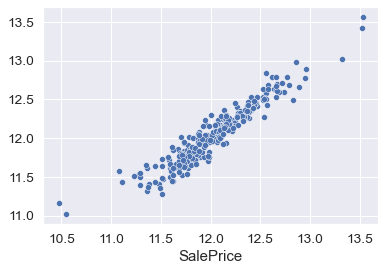

In [306]:
sns.scatterplot(y_test, y_pred_linear)

#### Ridge regression

In [307]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':range(0,101), 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=10, verbose=1, scoring = 'neg_mean_squared_error')
grid_ridge.fit(X, y)
sc_linear = get_best_score(grid_ridge)


Fitting 10 folds for each of 808 candidates, totalling 8080 fits
Best score is: 0.13387587479200433
Best parameters are: {'alpha': 7, 'normalize': False, 'tol': 1e-06}
Best estimator is : Ridge(alpha=7, tol=1e-06)


In [124]:
from sklearn.linear_model import Ridge

model2= Ridge(alpha=7, normalize=False, tol=1e-06)
model2.fit(X_train, y_train)
y_pred_ridge = model2.predict(X_test)
r2_model2=r2_score(y_test, y_pred_ridge)
rmse_model2=mean_squared_error(y_test, y_pred_ridge)
print("R2 score of Ridge model is:",r2_score(y_test, y_pred_ridge))
print("RMSE of the Ridge model is:", mean_squared_error(y_test, y_pred_ridge) )

R2 score of Ridge model is: 0.8956008536048566
RMSE of the Ridge model is: 0.016833563443831308


<AxesSubplot:xlabel='SalePrice'>

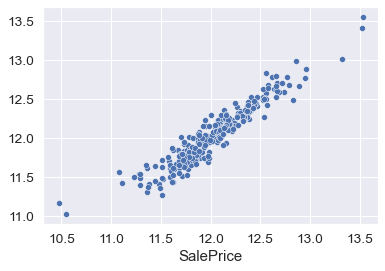

In [309]:
sns.scatterplot(y_test, y_pred_ridge)

#### Lasso

In [73]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=10, verbose=1, scoring = 'neg_mean_squared_error')
grid_lasso.fit(X, y)

sc_lasso = get_best_score(grid_lasso)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score is: 0.14572362590793114
Best parameters are: {'alpha': 0.001, 'normalize': False, 'tol': 0.001}
Best estimator is : Lasso(alpha=0.001, tol=0.001)


In [294]:
model3= Lasso(alpha=0.001, tol=0.001)
model3.fit(X_train, y_train)
y_pred_lasso = model3.predict(X_test)
r2_model3=r2_score(y_test, y_pred_lasso)
rmse_model3=mean_squared_error(y_test, y_pred_lasso)
print("R2 score of Lasso model is:",r2_score(y_test, y_pred_lasso))
print("RMSE of the Lasso model is:", mean_squared_error(y_test, y_pred_lasso) )

R2 score of Lasso model is: 0.8952100175230673
RMSE of the Lasso model is: 0.016896582771154526


<AxesSubplot:xlabel='SalePrice'>

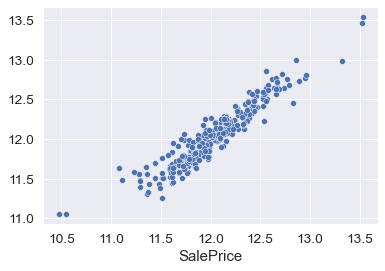

In [160]:
sns.scatterplot(y_test, y_pred_lasso)

#### Elastic Net

In [76]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv=10, verbose=1, scoring = 'neg_mean_squared_error')
grid_enet.fit(X, y)

sc_enet = get_best_score(grid_enet)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score is: 0.14910442607577226
Best parameters are: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.001}
Best estimator is : ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, tol=0.001)


In [295]:
model4= ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, tol=0.001)
model4.fit(X_train, y_train)
y_pred_en = model4.predict(X_test)
r2_model4=r2_score(y_test, y_pred_en)
rmse_model4=mean_squared_error(y_test, y_pred_en)
print("R2 score of Elastic Net model is:",r2_score(y_test, y_pred_en))
print("RMSE of the Elastic net model is:", mean_squared_error(y_test, y_pred_en) )

R2 score of Elastic Net model is: 0.88649835117137
RMSE of the Elastic net model is: 0.018301272304512697


<AxesSubplot:xlabel='SalePrice'>

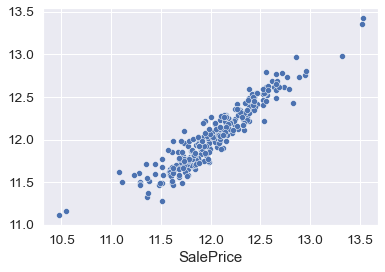

In [162]:
sns.scatterplot(y_test, y_pred_en)

#### Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
grid_dtree.fit(X, y)

sc_dtree = get_best_score(grid_dtree)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best score is: 0.17524351245243666
Best parameters are: {'max_depth': 7, 'max_features': 14, 'max_leaf_nodes': None, 'min_samples_split': 30, 'random_state': 5}
Best estimator is : DecisionTreeRegressor(max_depth=7, max_features=14, min_samples_split=30,
                      random_state=5)


In [296]:
model5= DecisionTreeRegressor(max_depth=7, max_features=14, min_samples_split=30,
                      random_state=5)
model5.fit(X_train, y_train)
y_pred_dtr = model5.predict(X_test)
r2_model5=r2_score(y_test, y_pred_dtr)
rmse_model5=mean_squared_error(y_test, y_pred_dtr)
print("R2 score of Decision Tree model is:",r2_score(y_test, y_pred_dtr))
print("RMSE of the Decision Tree model is:", mean_squared_error(y_test, y_pred_dtr) )

R2 score of Decision Tree model is: 0.7927409987360061
RMSE of the Decision Tree model is: 0.033418927908445584


<AxesSubplot:xlabel='SalePrice'>

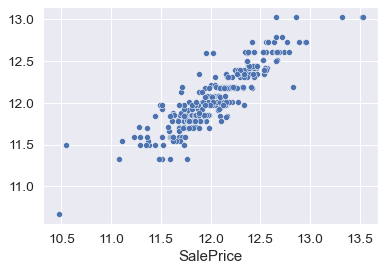

In [164]:
sns.scatterplot(y_test, y_pred_dtr)

#### RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
grid_rf.fit(X, y)

sc_rf = get_best_score(grid_rf)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score is: 0.14755111466101908
Best parameters are: {'min_samples_split': 4, 'n_estimators': 100, 'random_state': 5}
Best estimator is : RandomForestRegressor(min_samples_split=4, random_state=5)


In [297]:
model6= RandomForestRegressor(min_samples_split=4, random_state=5)
model6.fit(X_train, y_train)
y_pred_rfr = model6.predict(X_test)
r2_model6=r2_score(y_test, y_pred_rfr)
rmse_model6=mean_squared_error(y_test, y_pred_rfr)
print("R2 score of Random forest regressor model is:",r2_score(y_test, y_pred_rfr))
print("RMSE of the Random forest regressor model is:", mean_squared_error(y_test, y_pred_rfr) )

R2 score of Random forest regressor model is: 0.8938003005224214
RMSE of the Random forest regressor model is: 0.01712388884967743


<AxesSubplot:xlabel='SalePrice'>

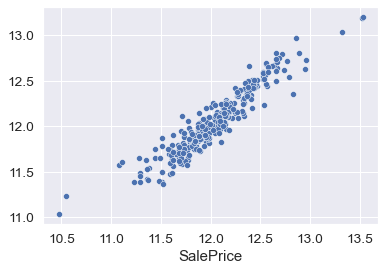

In [166]:
sns.scatterplot(y_test, y_pred_rfr)

#### KNN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, refit=True, verbose=1)
grid_knn.fit(X, y)

sc_knn = get_best_score(grid_knn)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best score is: nan
Best parameters are: {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}
Best estimator is : KNeighborsRegressor(algorithm='ball_tree', n_neighbors=6, weights='distance')


In [298]:
model7= KNeighborsRegressor(algorithm='ball_tree', n_neighbors=6, weights='distance')
model7.fit(X_train, y_train)
y_pred_knn = model7.predict(X_test)
r2_model7=r2_score(y_test, y_pred_knn)
rmse_model7=mean_squared_error(y_test, y_pred_knn)
print("R2 score of KNN regressor model is:",r2_score(y_test, y_pred_knn))
print("RMSE of the KNN regressor model is:", mean_squared_error(y_test, y_pred_knn) )

R2 score of KNN regressor model is: 0.8033445526738443
RMSE of the KNN regressor model is: 0.03170918597945419


<AxesSubplot:xlabel='SalePrice'>

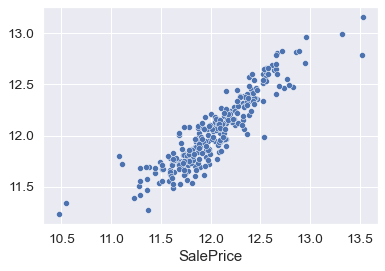

In [168]:
sns.scatterplot(y_test, y_pred_knn)

#### SVR

In [299]:
from sklearn.svm import SVR
model8= SVR()
model8.fit(X_train, y_train)
y_pred_svr = model8.predict(X_test)
r2_model8=r2_score(y_test, y_pred_svr)
rmse_model8=mean_squared_error(y_test, y_pred_svr)
print("R2 score of KNN regressor model is:",r2_score(y_test, y_pred_svr))
print("RMSE of the KNN regressor model is:", mean_squared_error(y_test, y_pred_svr) )

R2 score of KNN regressor model is: 0.8885474162220096
RMSE of the KNN regressor model is: 0.017970876245526488


#### XGBoost

In [313]:
from xgboost import XGBRegressor
param_grid = {'learning_rate': [0.01,0.05,0.07, 0.1, 0.3, 0.5],
        'max_depth': [1,2,3, 5],
        'min_child_weight': [2, 3,4, 5],
        'subsample': [0.5, 0.7,0.9,1]
        }
grid_xgb = GridSearchCV(XGBRegressor(), param_grid, cv=10, refit=True, verbose=1)
grid_xgb.fit(X, y)

sc_xgb = get_best_score(grid_xgb)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Best score is: nan
Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7}
Best estimator is : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [48]:
from xgboost import XGBRegressor
model9= XGBRegressor(learning_rate=0.1,max_depth=3, min_child_weight=2,subsample=0.7)
model9.fit(X_train, y_train)
y_pred_xgbr = model9.predict(X_test)
r2_model9=r2_score(y_test, y_pred_xgbr)
rmse_model9=mean_squared_error(y_test, y_pred_xgbr)
print("R2 score of KNN regressor model is:",r2_score(y_test, y_pred_xgbr))
print("RMSE of the KNN regressor model is:", mean_squared_error(y_test, y_pred_xgbr) )

R2 score of KNN regressor model is: 0.9090961921756848
RMSE of the KNN regressor model is: 0.014657543372094505


<AxesSubplot:xlabel='SalePrice'>

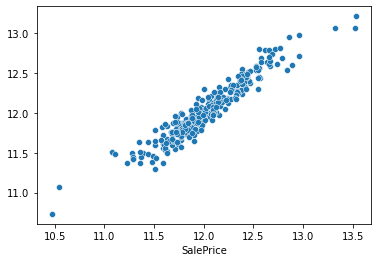

In [49]:
sns.scatterplot(y_test, y_pred_xgbr)

<AxesSubplot:>

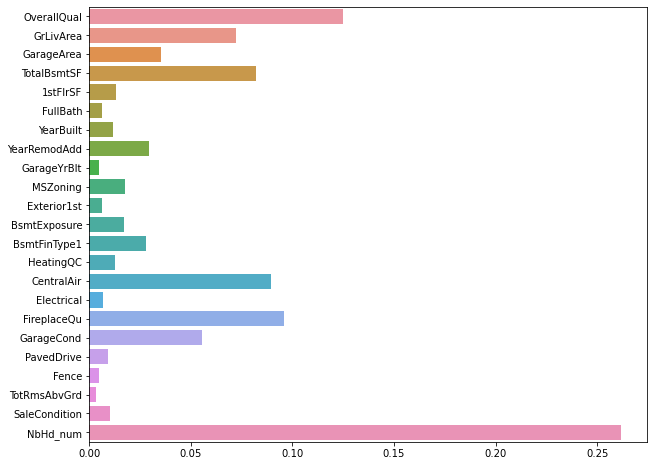

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(model9.feature_importances_, X.columns)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
model10= GradientBoostingRegressor(learning_rate=0.1,
    n_estimators=100,
    subsample=0.9)
model10.fit(X_train, y_train)
y_pred_gbr = model10.predict(X_test)
r2_model10=r2_score(y_test, y_pred_gbr)
rmse_model10=mean_squared_error(y_test, y_pred_gbr)
print("R2 score of KNN regressor model is:",r2_score(y_test, y_pred_gbr))
print("RMSE of the KNN regressor model is:", mean_squared_error(y_test, y_pred_gbr) )

R2 score of KNN regressor model is: 0.9049270102992395
RMSE of the KNN regressor model is: 0.015329792045090152


#### Model Comparison

In [53]:
acc_table = pd.DataFrame({'Model': ['Linear Regression',
'Ridge',
'Lasso',
'Elastic Net',
'DecisionTreeRegressor',
'Random Forest Regressor',
'KNN Regressor',
'SVR',
'XGBoost Regressor'],
                         'R2 score': [r2_model1,
                                           r2_model2,
                                           r2_model3,
                                           r2_model4,
                                           r2_model5,
                                     r2_model6,
                                     r2_model7,
                                     r2_model8,
                                     r2_model9],
                         'RMSE': [ rmse_model1,
                                           rmse_model2,
                                           rmse_model3,
                                           rmse_model4,
                                           rmse_model5,
                                     rmse_model6,
                                     rmse_model7,
                                     rmse_model8,
                                     rmse_model9],
                         })
acc_table = acc_table.sort_values(by='R2 score', ascending=False)
acc_table.style.background_gradient(cmap='Greens')

NameError: name 'r2_model2' is not defined

In [54]:
import pickle
# open a file, where you want to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(model9, file)